In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, minmax_scale
from datetime import datetime

sys.path.append('../../library/')

from data import load_scaled_datasets, load_raw_datasets, calc_z_bins

In [2]:
path_data = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/"
num_particles = "large"
output_cols = ["z", "hid"]
scaler_out = MinMaxScaler()
subset = 0.25
num_z_bins = 100
mass = False


In [3]:
train_inputs_raw, train_outputs_raw = load_raw_datasets(path_data,
                                                        num_particles, 
                                                        "train",
                                                        output_cols,
                                                        subset)

valid_inputs_raw, valid_outputs_raw = load_raw_datasets(path_data,
                                                        num_particles, 
                                                        "valid",
                                                        output_cols,
                                                        subset)


In [4]:
train_inputs,\
train_outputs,\
valid_inputs,\
valid_outputs = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)

z_bins = calc_z_bins(train_outputs_raw, valid_outputs_raw, num_z_bins)

In [5]:
print(train_inputs.shape)
print(train_outputs.shape)
print(valid_inputs.shape)
print(valid_outputs.shape)

(1250, 1200, 800, 1)
(1250, 100)
(250, 1200, 800, 1)
(250, 100)


In [6]:
def ranked_probability_score(y_true, y_pred):
    return np.mean((np.cumsum(y_true, axis=1) - np.cumsum(y_pred, axis=1)) ** 2) / (y_true.shape[1] -1)

In [7]:
model_path = "/glade/p/cisl/aiml/ggantos/holodec/zdist_large/"
models = [x[0] for x in os.walk(model_path)][1:]
models

['/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense_pool220_dense512',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense32168_50e',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense643216_kernel4',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense_pool420_dense512',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense25612864',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000_dense25612864',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense1024',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000_pool444',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000_dense25612864_filters81632',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense32168',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_pool444_dense2048',
 '/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_lr1e-2',
 '/glade/p/cisl/aiml/gga

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense_pool220_dense512
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.007


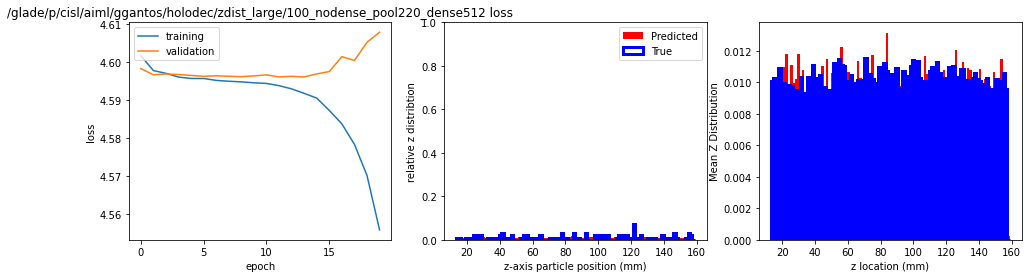

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense32168_50e
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.013


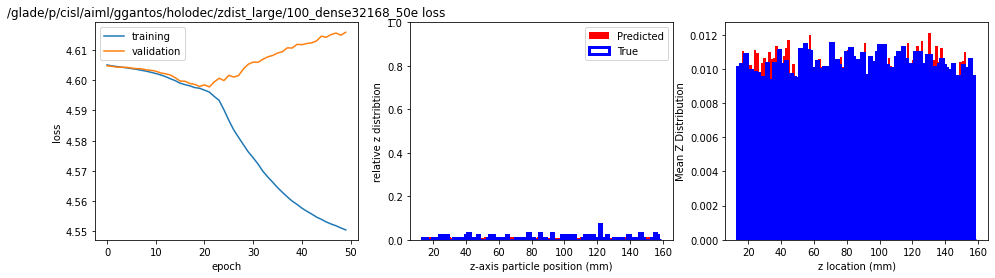

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense643216_kernel4
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.013


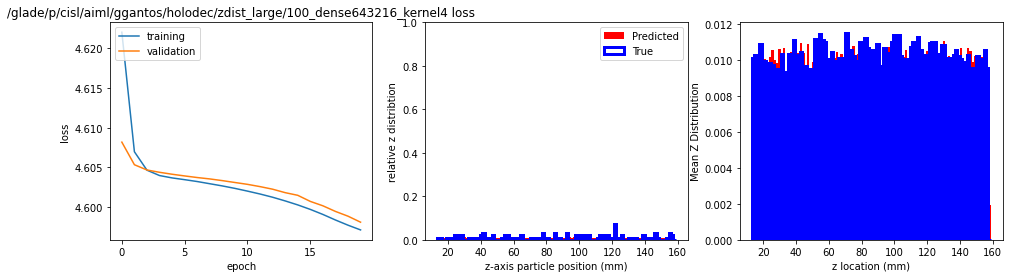

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense_pool420_dense512
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.013


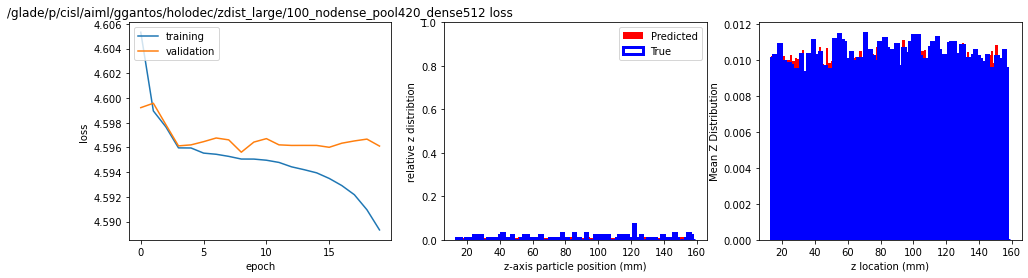

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense25612864
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.014


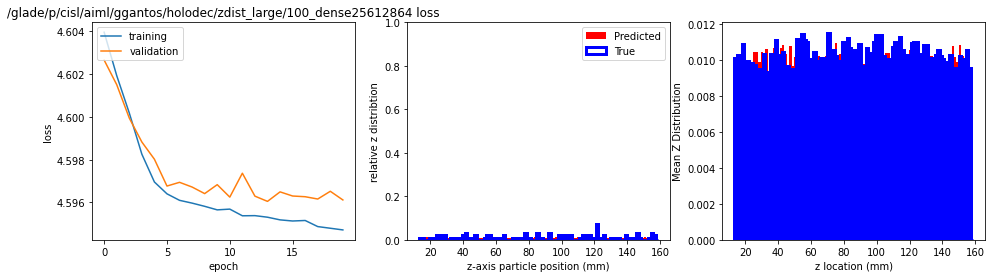

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense1024
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.014


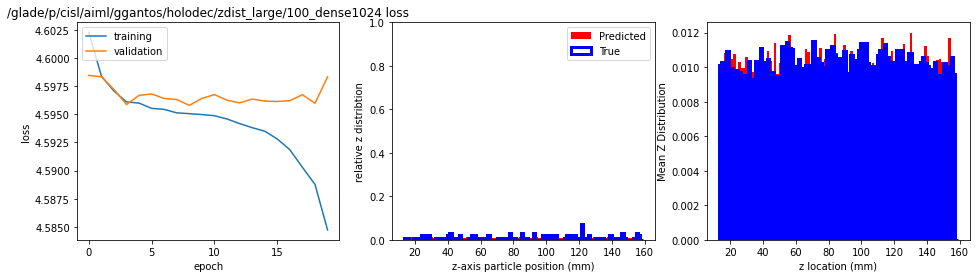

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.049


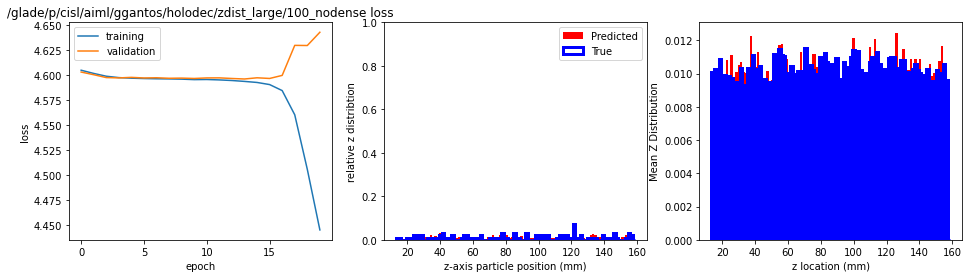

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense32168
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.013


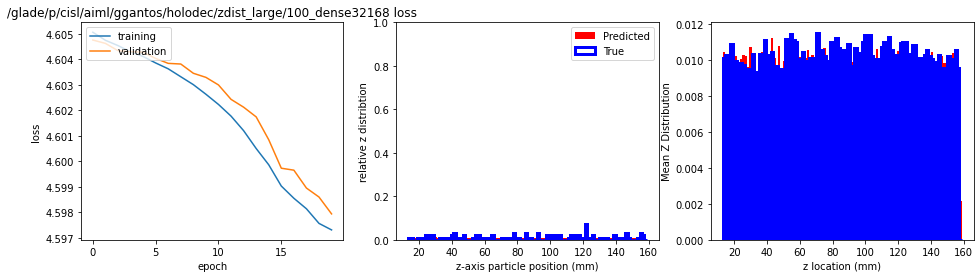

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_pool444_dense2048
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.002


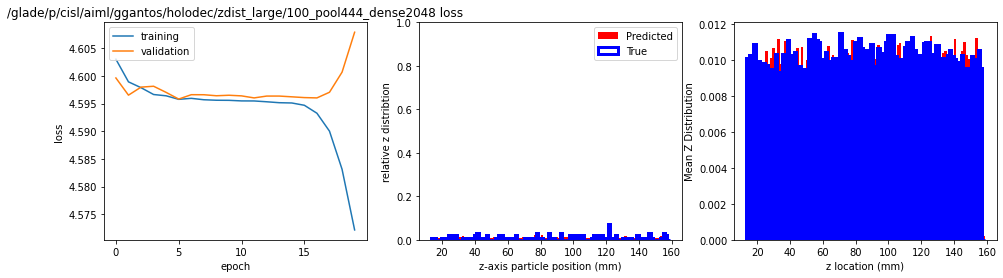

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_lr1e-2
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.014


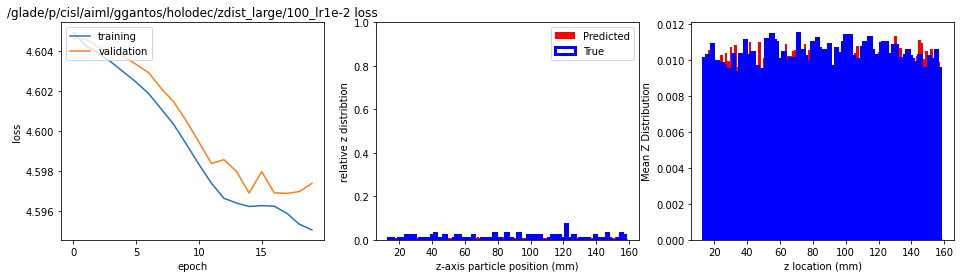

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.010


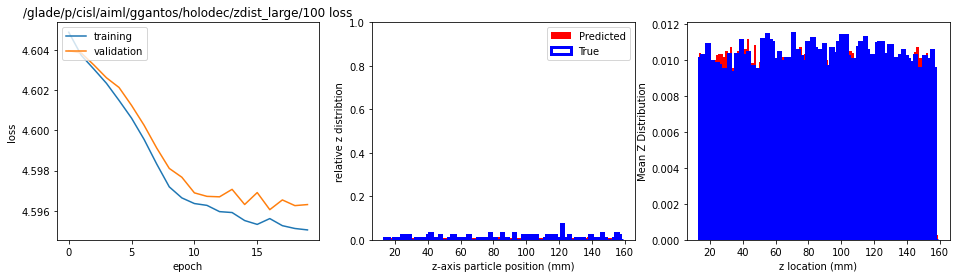

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense6432
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.014


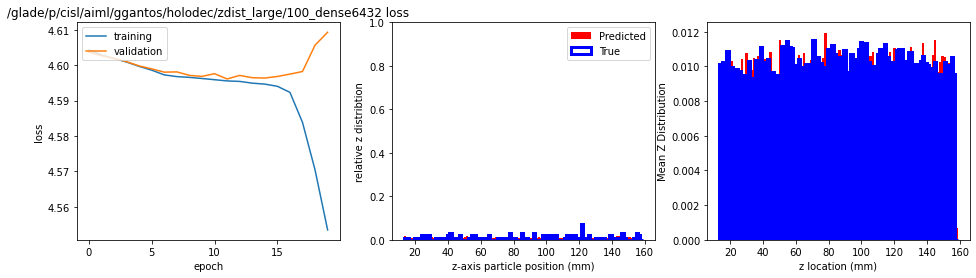

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense6432168
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.014


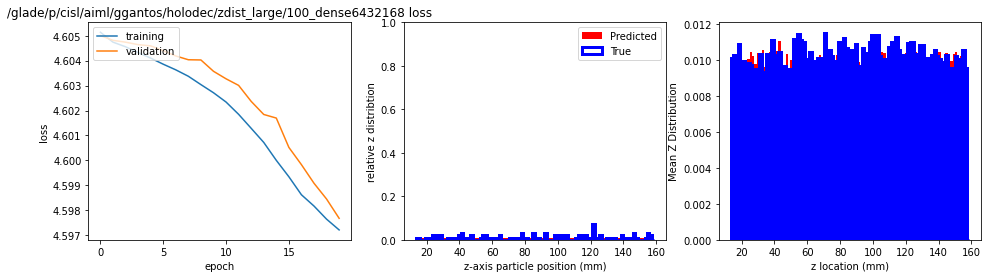

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense643216_50e
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.058


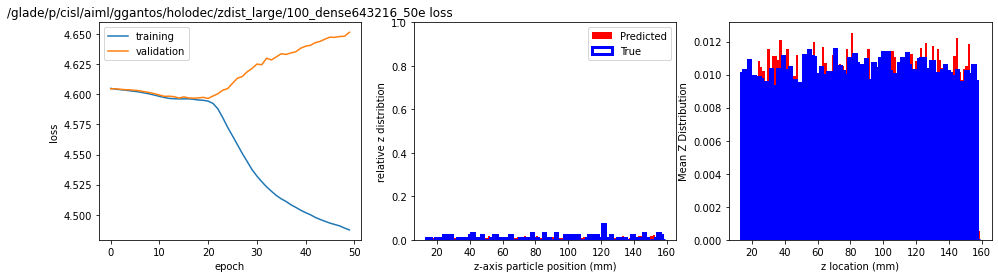

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense321684
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.009


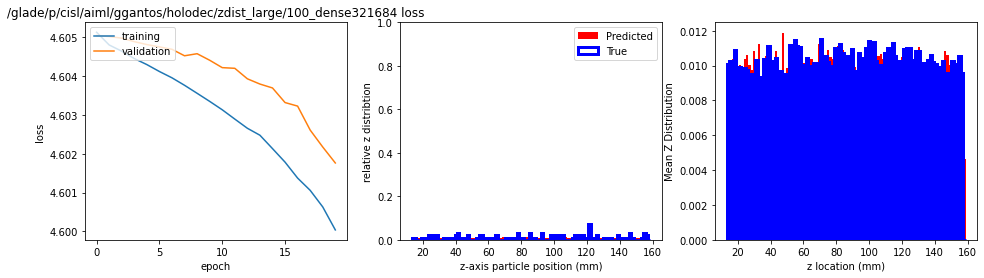

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense512
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.011


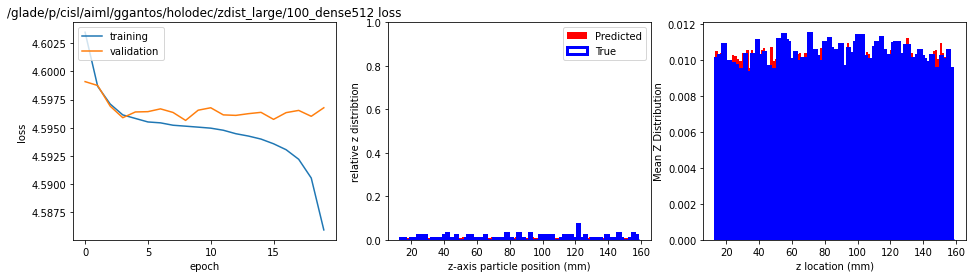

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_lr1e-4
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.010


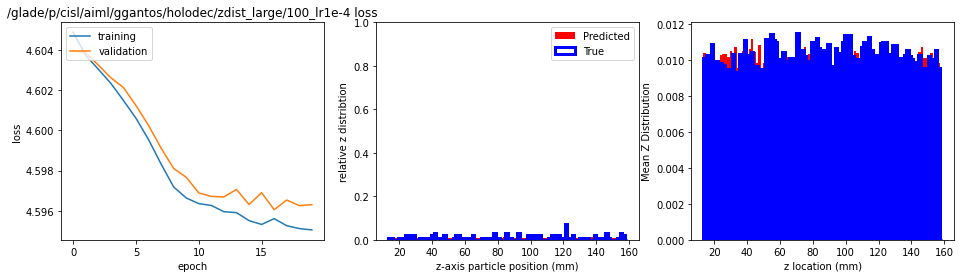

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_dense643216
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.015


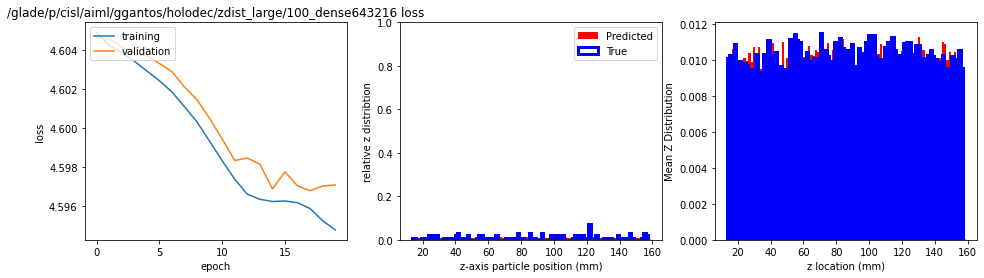

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense_pool220_dense256
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.034


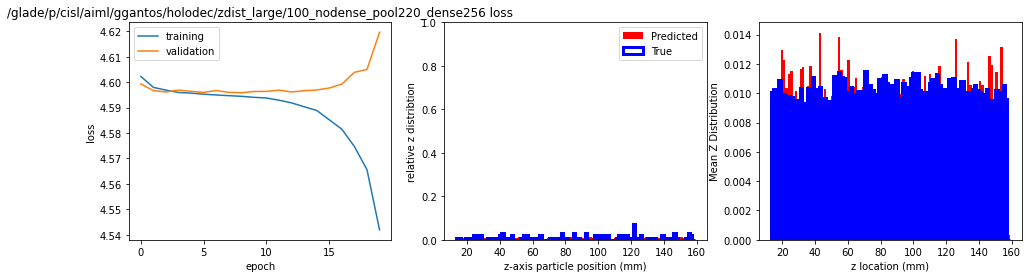

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_nodense_pool220
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.050


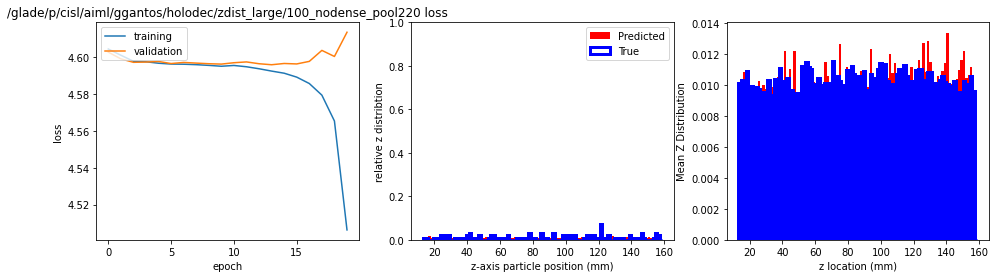

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_pool444_dense1024
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.004


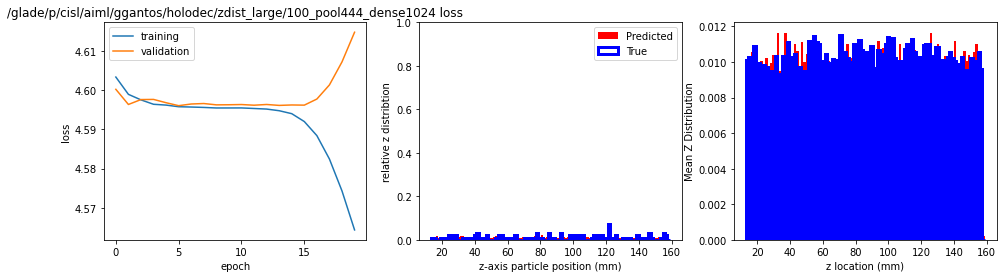

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/100_pool444
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.009


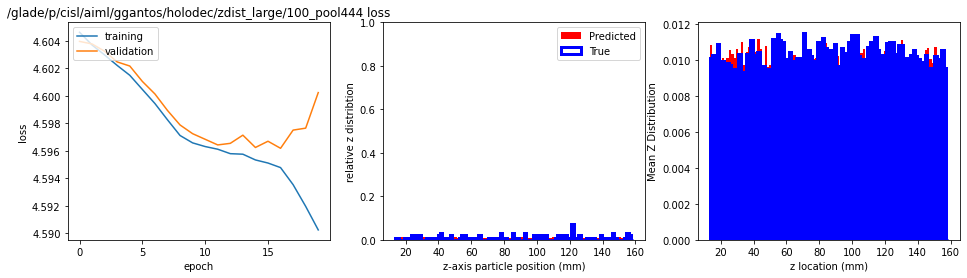

In [8]:
valid_index = 11
bin_size = z_bins[1] - z_bins[0]

for model in [m for m in models if '1000' not in m]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(loss)
    axes[0].plot(val_loss)
    axes[0].set_title(f'{model} loss')
    axes[0].set_ylabel('loss')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='upper left')
    
    axes[1].bar(z_bins / 1000, valid_outputs_pred[valid_index], bin_size / 1000, color='red', label="Predicted")
    axes[1].bar(z_bins / 1000, valid_outputs[valid_index], bin_size / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
    axes[1].set_ylim(0, 1)
    axes[1].set_xlabel("z-axis particle position (mm)")
    axes[1].set_ylabel("relative z distribtion")
    axes[1].legend(loc="best")
    
    axes[2].bar(z_bins / 1000, valid_outputs_pred.mean(axis=0), (z_bins[1] - z_bins[0]) / 1000, color='red')
    axes[2].bar(z_bins / 1000, valid_outputs.mean(axis=0), (z_bins[1]-z_bins[0]) / 1000, edgecolor='blue', facecolor="none", lw=3)
    axes[2].set_xlabel("z location (mm)")
    axes[2].set_ylabel("Mean Z Distribution")
    
    rps_nn = ranked_probability_score(valid_outputs, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(f"RPS_nn: {rps_nn:0.3f}", f"RPS_climo: {rps_climo:0.3f}")
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")
    plt.show()

In [9]:
num_z_bins = 1000

train_inputs_1000,\
train_outputs_1000,\
valid_inputs_1000,\
valid_outputs_1000 = load_scaled_datasets(path_data,
                                     num_particles,
                                     output_cols,
                                     scaler_out,
                                     subset,
                                     num_z_bins,
                                     mass)

z_bins_1000 = calc_z_bins(train_outputs_raw, valid_outputs_raw, num_z_bins)

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000_dense25612864
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.002


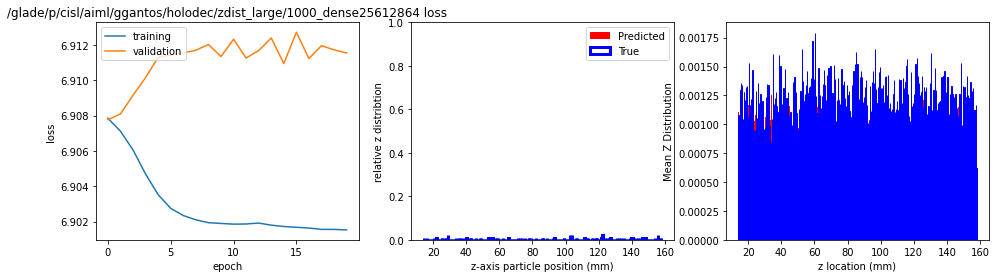

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000_pool444
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.002


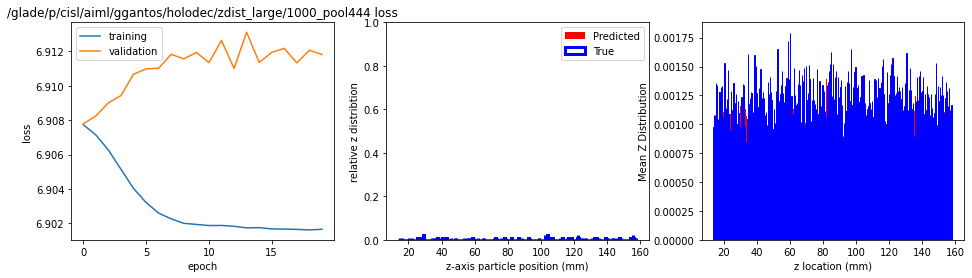

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000_dense25612864_filters81632
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: 0.001


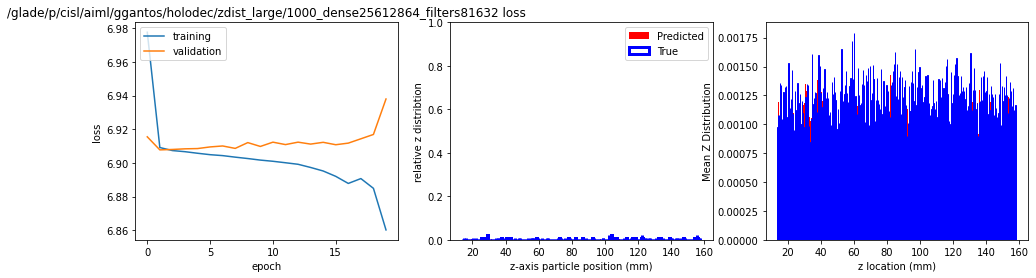

/glade/p/cisl/aiml/ggantos/holodec/zdist_large/1000
RPS_nn: 0.000 RPS_climo: 0.000
RPSS: -0.002


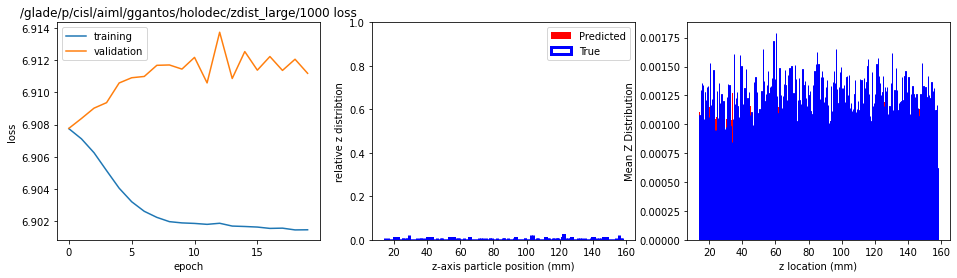

In [10]:
valid_index = 11
bin_size_1000 = z_bins_1000[1] - z_bins_1000[0]

for model in [m for m in models if '1000' in m]:
    print(model)
    train_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "train_outputs_pred.csv"))
    valid_outputs_pred = np.genfromtxt(os.path.join(model_path, model, "valid_outputs_pred.csv"))
    
    loss = np.genfromtxt(os.path.join(model_path, model, "loss.csv"))
    val_loss = np.genfromtxt(os.path.join(model_path, model, "val_loss.csv"))
    
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    axes[0].plot(loss)
    axes[0].plot(val_loss)
    axes[0].set_title(f'{model} loss')
    axes[0].set_ylabel('loss')
    axes[0].set_xlabel('epoch')
    axes[0].legend(['training', 'validation'], loc='upper left')
    
    axes[1].bar(z_bins_1000 / 1000, valid_outputs_pred[valid_index], bin_size_1000 / 1000, color='red', label="Predicted")
    axes[1].bar(z_bins_1000 / 1000, valid_outputs_1000[valid_index], bin_size_1000 / 1000, edgecolor='blue', facecolor="none", lw=3, label="True")
    axes[1].set_ylim(0, 1)
    axes[1].set_xlabel("z-axis particle position (mm)")
    axes[1].set_ylabel("relative z distribtion")
    axes[1].legend(loc="best")
    
    axes[2].bar(z_bins_1000 / 1000, valid_outputs_pred.mean(axis=0), (bin_size_1000) / 1000, color='red')
    axes[2].bar(z_bins_1000 / 1000, valid_outputs_1000.mean(axis=0), (bin_size_1000) / 1000, edgecolor='blue', facecolor="none", lw=1)
    axes[2].set_xlabel("z location (mm)")
    axes[2].set_ylabel("Mean Z Distribution")
    
    rps_nn = ranked_probability_score(valid_outputs_1000, valid_outputs_pred)
    rps_climo = ranked_probability_score(valid_outputs_1000, np.ones(valid_outputs_pred.shape) / valid_outputs_pred.shape[1])
    print(f"RPS_nn: {rps_nn:0.3f}", f"RPS_climo: {rps_climo:0.3f}")
    rpss = 1 - rps_nn / rps_climo
    print(f"RPSS: {rpss:0.3f}")
    plt.show()